CENG313 Introduction to Data Science
Fall 2021-2022
Lecturer: Dr. Duygu Sarıkaya
Teaching Assistant: Dr. Begüm Mutlu Bilge
Gazi University, Department of Computer Engineering
Assignment 2 due on 22nd of December 2021, Wednesday 23:59 

Assignment 2: K-means Clustering of Iris Flowers

In this homework we are expected to use iris flowers, to do this, we are loading iris dataset.

In [95]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df = iris_df.drop(columns = ['petal_len', 'petal_wid'])
iris_df

,sepal_len,sepal_wid,class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


1. Plot (scatter plot) the Iris flower data instances based on the two features of each flower: Sepal
Width and Sepal Length. You will have a 2D plot showing where each data instance (=flower) 

Our first question is to draw scatter plot of iris flowers. We are only using sepal lenght and sepal width column.

Text(0, 0.5, 'Sepal width')

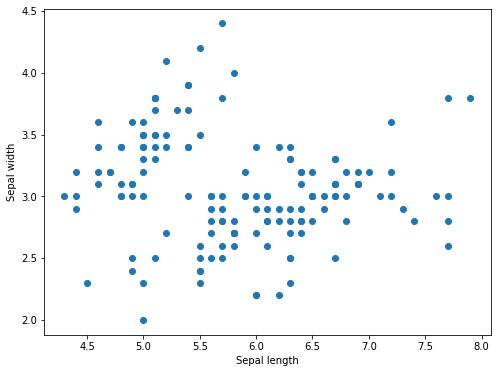

In [96]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(iris_df['sepal_len'], iris_df['sepal_wid'])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

2. Using the labels given for each flower in the dataset, color code the plot you have at Step 1.
You should plot each data instance (=flower) with the color set for its label.

In second question we are asked to, plot the same scatter plot but in this time, we are coloring points according to their labels with different colours.

Text(0, 0.5, 'Sepal width')

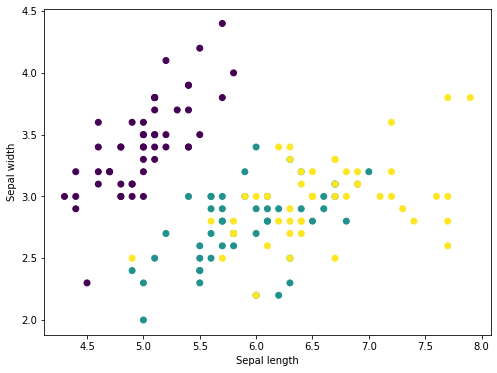

In [97]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(iris_df['sepal_len'], iris_df['sepal_wid'], c=iris_df['class'])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [98]:
iris_df_kmean = iris_df.drop(columns = ['class'])

For question 3, we are expected to implement k means from strecth, to do this i have different functions such as euclidian_distance, find_closest_cluster_centers, calculate_new_cluster_centers and KMean functions. euclidian_distance calculates distance between 2 points, find_closest_cluster_centers predicts every point, calculates distance between every cluster centers and takes the min distance as predict. calculate_new_cluster_centers in every step finds better cluster center, KMean function takes k as a parameter and creates random k number of cluster centers.


find_closest_cluster_centers calculates predicted cluster centers, calculates distances, takes the min distances as a predict, and predicts closest cluster as a predict.

In [99]:
def euclidian_distance(p1, p2):
    distance = (sum((p1 - p2)**2))**0.5
    return distance

def find_closest_cluster_centers(cluster_centers, iris_point):
    predicted_cluster = []
    for i in iris_point:
        distance=[]
        for j in cluster_centers:
            distance.append(euclidian_distance(i, j))
        predicted_cluster.append(np.argmin(distance))
    return predicted_cluster

calculate_new_cluster_centers calculates new cluster center points using mean operation, returns new cluster centers.

In [100]:
def calculate_new_cluster_centers(clusters, X):
    new_cluster_centers = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_cluster_centers.append(cluster_mean)
    return new_cluster_centers

KMean function which takes k as a parameter, for number of k, function creates k number of random cluster centers. Appends those randomly cluster centers to cluster center array. 

In [101]:
def KMean(k):
  initial_cluster_centers = random.sample(range(0, len(iris_df_kmean)), k)

  cluster_centers = []
  for i in initial_cluster_centers:
    cluster_centers.append(iris_df_kmean.loc[i])
  
  return np.array(cluster_centers)

3. In your k-means method, plot the initial random cluster centers for k=3 on the scatter plot
that you have at Step 1.

Lets see those initial cluster centers, in the scatter plot and cluster centers.

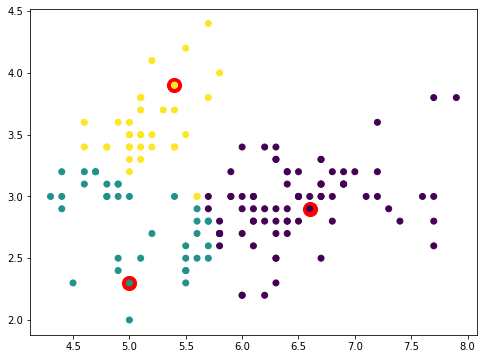

In [102]:
cluster_centers = KMean(3)

get_predicted_cluster_centers = find_closest_cluster_centers(cluster_centers, iris_df_kmean.values)
plt.figure(2, figsize=(8, 6))
plt.scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], c='red', s=200)
plt.scatter(iris_df_kmean.values[:, 0], iris_df_kmean.values[:, 1], c=get_predicted_cluster_centers)
plt.show()

4. Plot a similar plot to Step 3, this time with the new cluster centers for each iteration of your
k-means algorithm until it converges

For example, i choose 10 steps to find the best cluster centers, in every step program calculates new cluster centers, calculate distances and changes cluster centers if newly founded cluster centers are better than the old ones, As wanted in the question, i am printing scatter plot of centers and data points in every step.

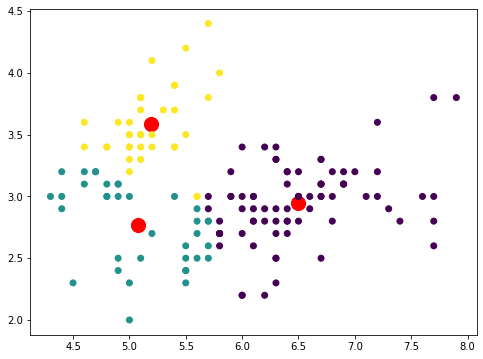

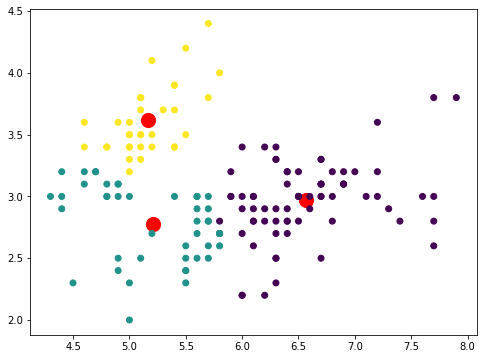

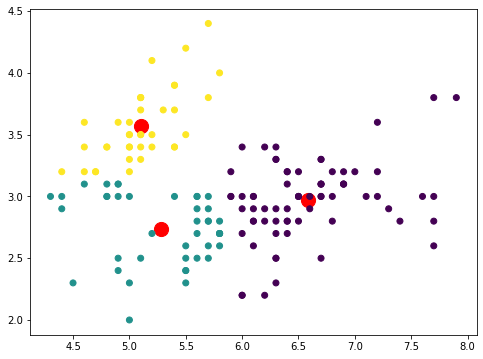

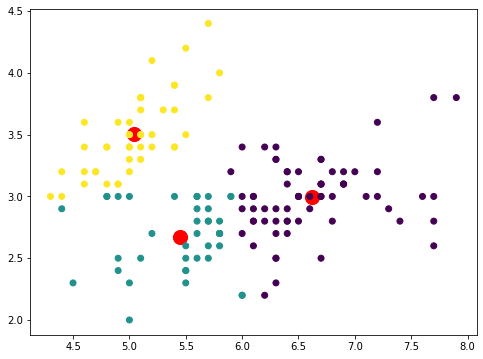

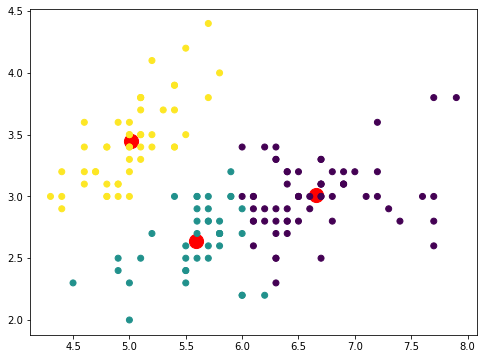

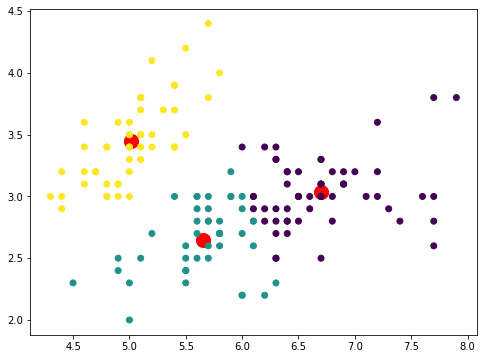

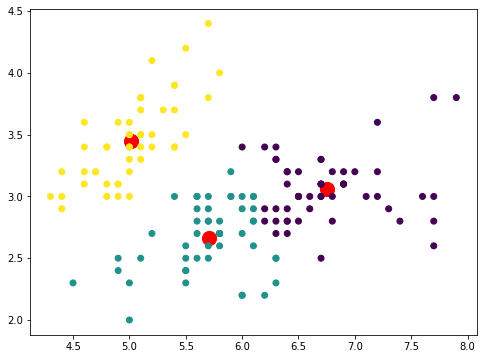

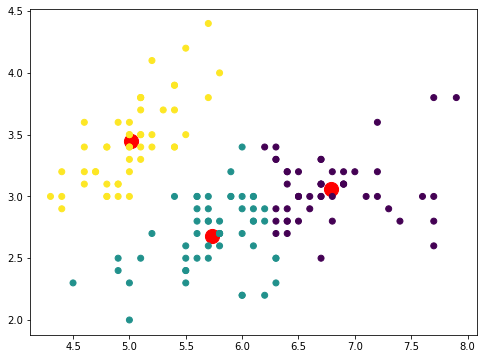

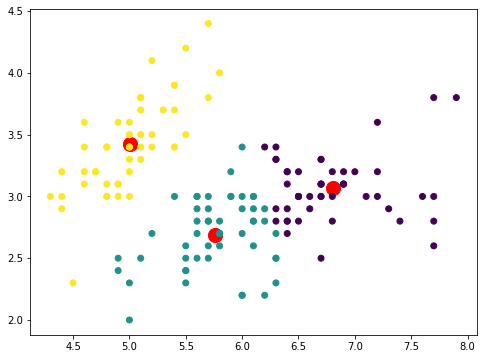

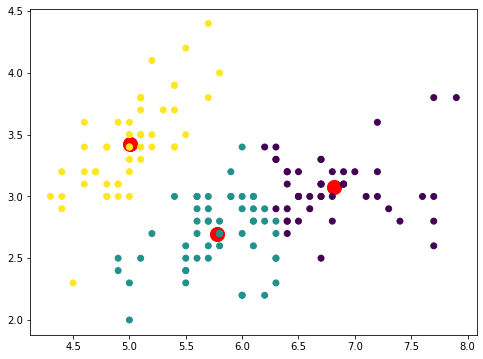

In [103]:
for i in range(10):
    get_predicted_cluster_centers = find_closest_cluster_centers(cluster_centers, iris_df_kmean.values)
    cluster_centers = calculate_new_cluster_centers(get_predicted_cluster_centers, iris_df_kmean.values)

    plt.figure(2, figsize=(8, 6))
    plt.clf()
    plt.scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], c='red', s=200)
    plt.scatter(iris_df_kmean.values[:, 0], iris_df_kmean.values[:, 1], c=get_predicted_cluster_centers)
    plt.show()

5. Show the plot you got at Step 2 and the plot you got at the last iteration of your k-means
algorithm at Step 4 (after it converges) together side by side in the same plot. Please discuss
what you see in these plots, and how the real labels are different from your clusters. Write this
discussion in comments.

Now as wanted, lets compare these two plots side by side. To do this i am using subplots to see difference between normal labeled plot which i got in step 2 vs plot i got in the last step of iteration of kmeans algorithm.

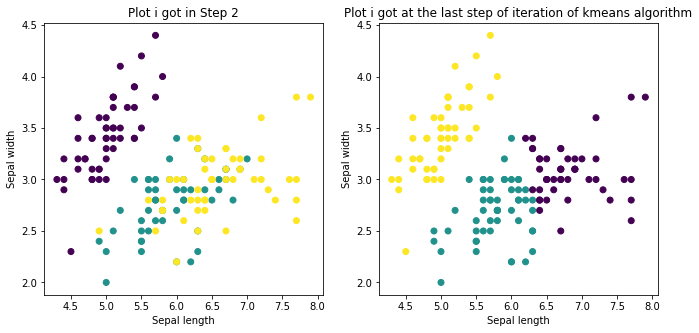

In [104]:
plt.figure(figsize=(11,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(iris_df['sepal_len'], iris_df['sepal_wid'], c=iris_df['class'])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Plot i got in Step 2")

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(iris_df_kmean.values[:, 0], iris_df_kmean.values[:, 1], c=get_predicted_cluster_centers)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Plot i got at the last step of iteration of kmeans algorithm")
plt.show()

As we can see there are differences between 2 scatter plots. One on the left is before k means and right is after k means. This is because in k means, we have K number of cluster centers and these cluster centers are updated in every iteration.In every iteration they find the best place where sum of distances of all points is lower than before point so it finds the best centers where that cluster center groups very similar points using their datas.As we see in the right picture, similar points are grouped together. This is the beauty of k means algorithm. It groups similar points which are similar so they are possibly the same label as well.